In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Creacion de la función

In [2]:
def padding(img):
    '''
    Funcion de padding que agrega 1 pixel de border con un color de intensidad intermedio,
    aunque sus efectos son de todos modos despreciables.
    
    <img> Imagen input en GRAYSCALE
    '''
    border_type = cv.BORDER_CONSTANT # Borde constante
    top = 1  # padding superior
    bottom = top # padding inferior
    left = 1  # pedding izquierda
    right = left # padding derecho
    value = [125] # valor para el padding
    dst = cv.copyMakeBorder(img, top, bottom, left, right, border_type, None, value) # aplica el pad
    return dst # devuelve la nueva imagen


def lbp_pixel(i,j,orig_pad):
    '''
    Aplica el algoritmo sobre el pixel i,j de la imagen con padding
    <i,j> Posicion respecto de la imagen original
    <orig_pad> Imagen original con padding, o imagen a aplicar el algoritmo
    '''
    pixel = orig_pad[i+1,j+1] # Toma el valor del pixel central
    window = orig_pad[i:i+3,j:j+3].flatten() # Toma los pixeles dentro del kernel 3x3
    window = np.delete(window,4) # Elimina el elemento 4 (pixel objetivo)
    binary_window = window >= pixel # Mascara de intensidades
    texture_value = np.packbits(binary_window) # Convierte a int el binario de la mascara
    return texture_value # Valor final de la textura


def LBP(img):
    '''
    Aplica el algoritmo LBP sobre la imagen objetivo
    <img> Imagen objetivo para aplicar el algoritmo
    '''
    rows= img.shape[0] # Filas
    columns = img.shape[1] # Columnas
    texture_matrix = np.zeros(img.shape) # Inicializo una matriz para llenar con las texturas
    padded_image = padding(img) # Pad de la imagen
    for i in range(rows):
        for j in range(columns):
            texture_matrix[i,j] = lbp_pixel(i,j,padded_image)
    return texture_matrix

# Aplicaciones

## Ladirllos

In [3]:
l1 = cv.imread('ladrillos1.png')
l1 = cv.cvtColor(l1,cv.COLOR_BGR2GRAY)
l2 = cv.imread('ladrillos2.png')
l2 = cv.cvtColor(l2,cv.COLOR_BGR2GRAY)


In [4]:
l1_text = LBP(l1)
l2_text = LBP(l2)

In [10]:
bins,heights = np.histogram(l1_text,bins=2)

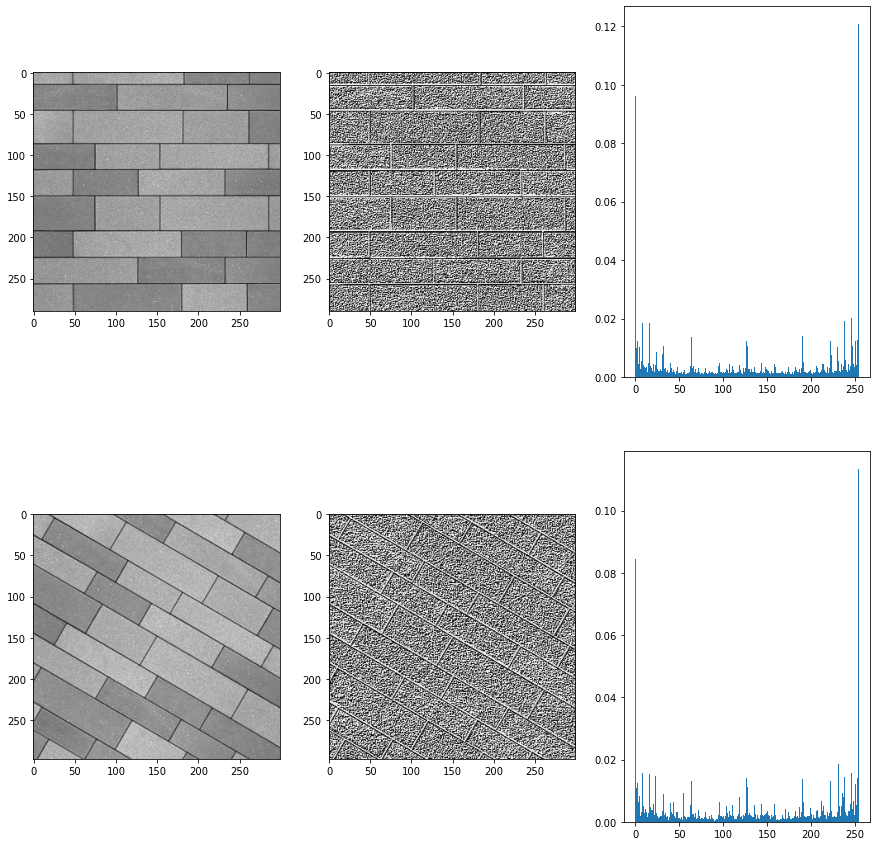

In [19]:
f, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,15))

ax[0][0].imshow(l1,'gray')
ax[1][0].imshow(l2,'gray')
ax[0][1].imshow(l1_text,'gray')
ax[1][1].imshow(l2_text,'gray')
proba_text1,bins1, _ = ax[0][2].hist(x=l1_text.flatten(),bins=256,density=True)
proba_text1,bins2, _ = ax[1][2].hist(x=l2_text.flatten(),bins=256,density=True)

plt.show()

Vemos que la crossentropy para diferentes bines aumenta linealmente, por lo que no existe un punto que sea matematicamente optimo. Hace falta probar en las aplicaciones y entonces determinar cual funciona mejor.

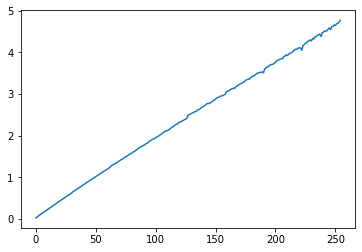

In [72]:
l1f = l1_text.flatten()
l2f = l2_text.flatten()

cross_entropy_ladrillo= []
for i in range(1,256):
    proba_text1,_ = np.histogram(l1f,bins=i,density=True)
    proba_text2,_ = np.histogram(l2f,bins=i,density=True)
    xentropy = - np.sum(proba_text1 * np.log(proba_text2))
    cross_entropy_ladrillo.append(xentropy)
plt.plot(cross_entropy_ladrillo)
plt.show()

Vemos una secuencia de histogramas con bines multiplos de 8 como se van diferenciando con la complejidad

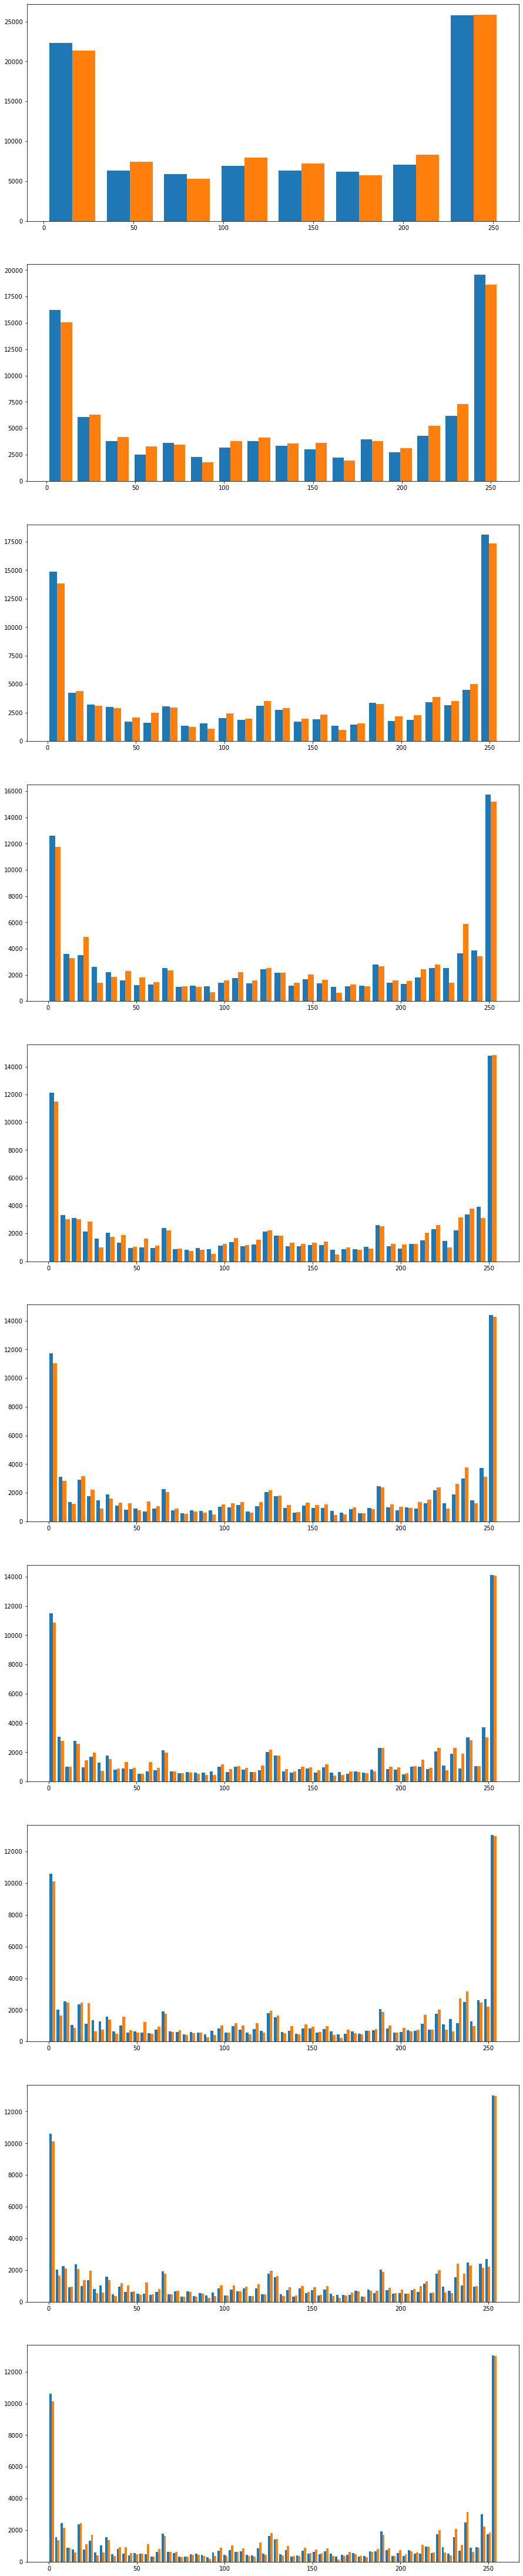

In [58]:
l1f = l1_text.flatten()
l2f = l2_text.flatten()

fig,ax = plt.subplots(nrows=10,ncols=1,figsize=(15,80))

for i in range(0,10):
    _,_,_ = ax[i].hist([l1f,l2f],bins=8*(i+1))
plt.show()



## Ovejas

In [17]:
oveja1 = cv.imread('oveja1.png',cv.IMREAD_GRAYSCALE)
oveja1_texture = LBP(oveja1)

oveja2 = cv.imread('oveja2.png',cv.IMREAD_GRAYSCALE)
oveja2_texture = LBP(oveja2)

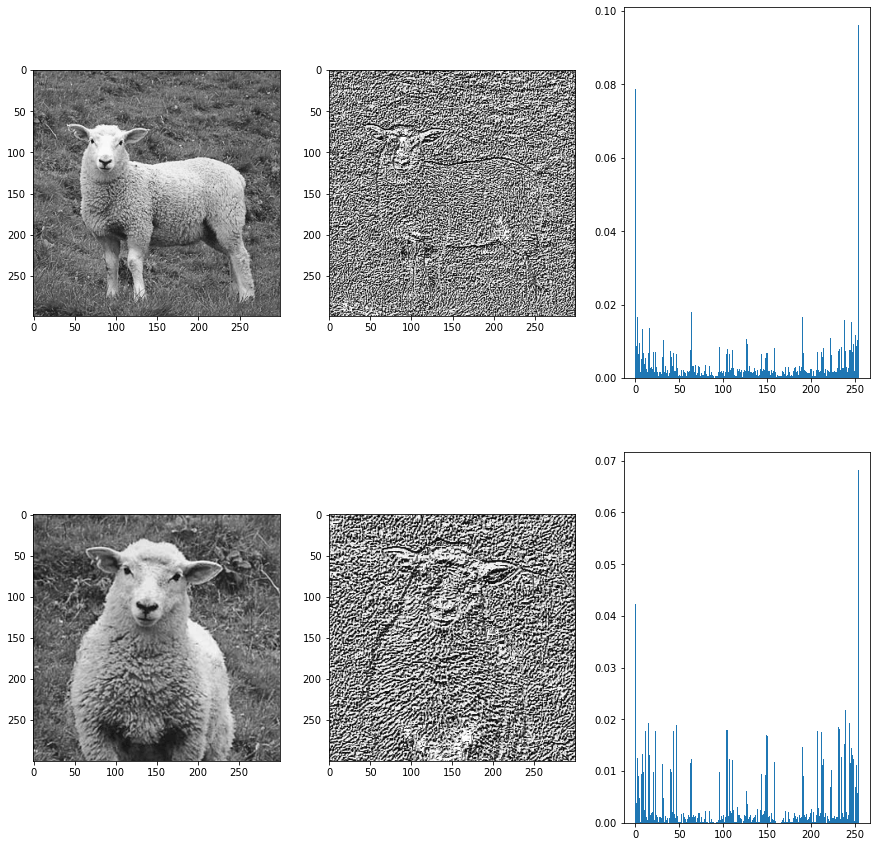

In [47]:
f, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,15))

ax[0][0].imshow(oveja1,'gray')
ax[1][0].imshow(oveja2,'gray')
ax[0][1].imshow(oveja1_texture,'gray')
ax[1][1].imshow(oveja2_texture,'gray')
proba_ov1,bins1, _ = ax[0][2].hist(x=oveja1_texture.flatten(),bins=256,density=True)
proba_ov1,bins2, _ = ax[1][2].hist(x=oveja2_texture.flatten(),bins=256,density=True)

plt.show()

In [41]:
ax.shape

(5, 2)

En el caso de la oveja vemos que la diferencia se vuelve mayor entre la concentración en los diferentes bines.

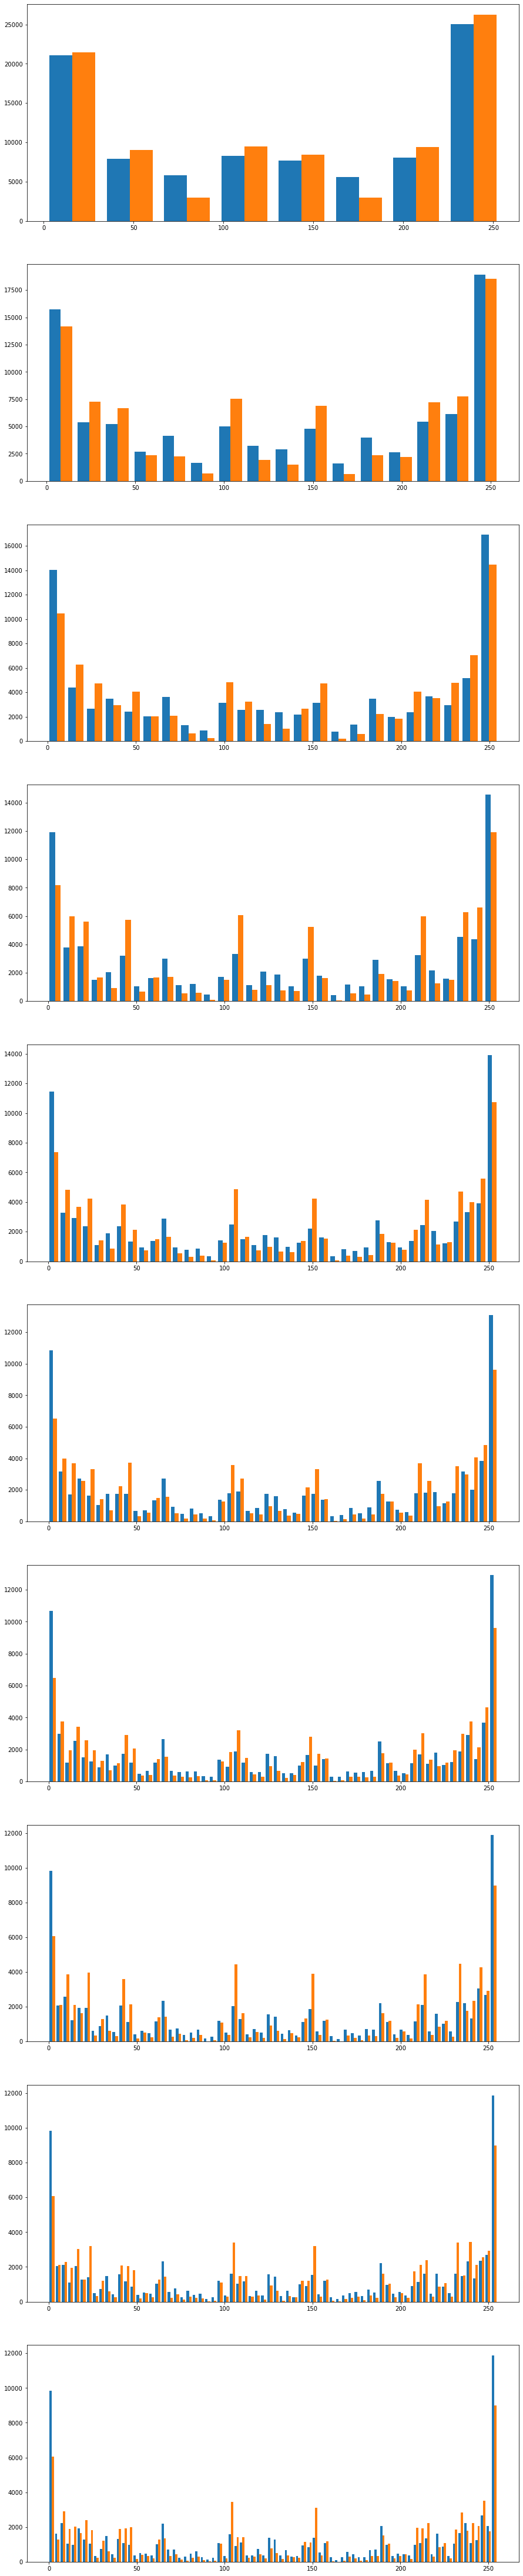

In [66]:
ov1f = oveja1_texture.flatten()
ov2f = oveja2_texture.flatten()

fig,ax = plt.subplots(nrows=10,ncols=1,figsize=(15,80))

for i in range(0,10):
    _,_,_ = ax[i].hist([ov1f,ov2f],bins=8*(i+1))
plt.show()



<ipython-input-69-753b5cfa4db3>:8: RuntimeWarning: divide by zero encountered in log
  xentropy = - np.sum(proba_ov1 * np.log(proba_ov2))


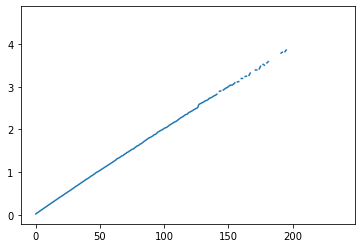

In [69]:
l1f = oveja1_texture.flatten()
l2f = oveja2_texture.flatten()

cross_entropy_oveja= []
for i in range(1,256):
    proba_ov1,_ = np.histogram(l1f,bins=i,density=True)
    proba_ov2,_ = np.histogram(l2f,bins=i,density=True)
    xentropy = - np.sum(proba_ov1 * np.log(proba_ov2))
    cross_entropy_oveja.append(xentropy)
plt.plot(cross_entropy_oveja)
plt.show()

# Ovejas vs Ladrillos

Vemos que no se alejan mucho entre sí, por lo que se trata de diferencias de magnitudes similares.
Este resultado parece algo antiintuitivo al mirar los gráficos de los hitogramas.

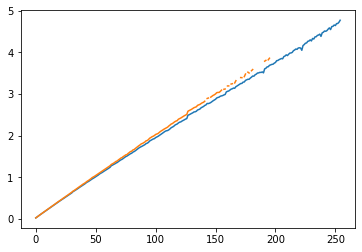

In [85]:
plt.plot(cross_entropy_ladrillo)
plt.plot(cross_entropy_oveja)

plt.show()

## Piedras

In [18]:
piedras1 = cv.imread('piedras1.png',cv.IMREAD_GRAYSCALE)
piedras1_texture = LBP(piedras1)

piedras2 = cv.imread('piedras2.png',cv.IMREAD_GRAYSCALE)
piedras2_texture = LBP(piedras2)

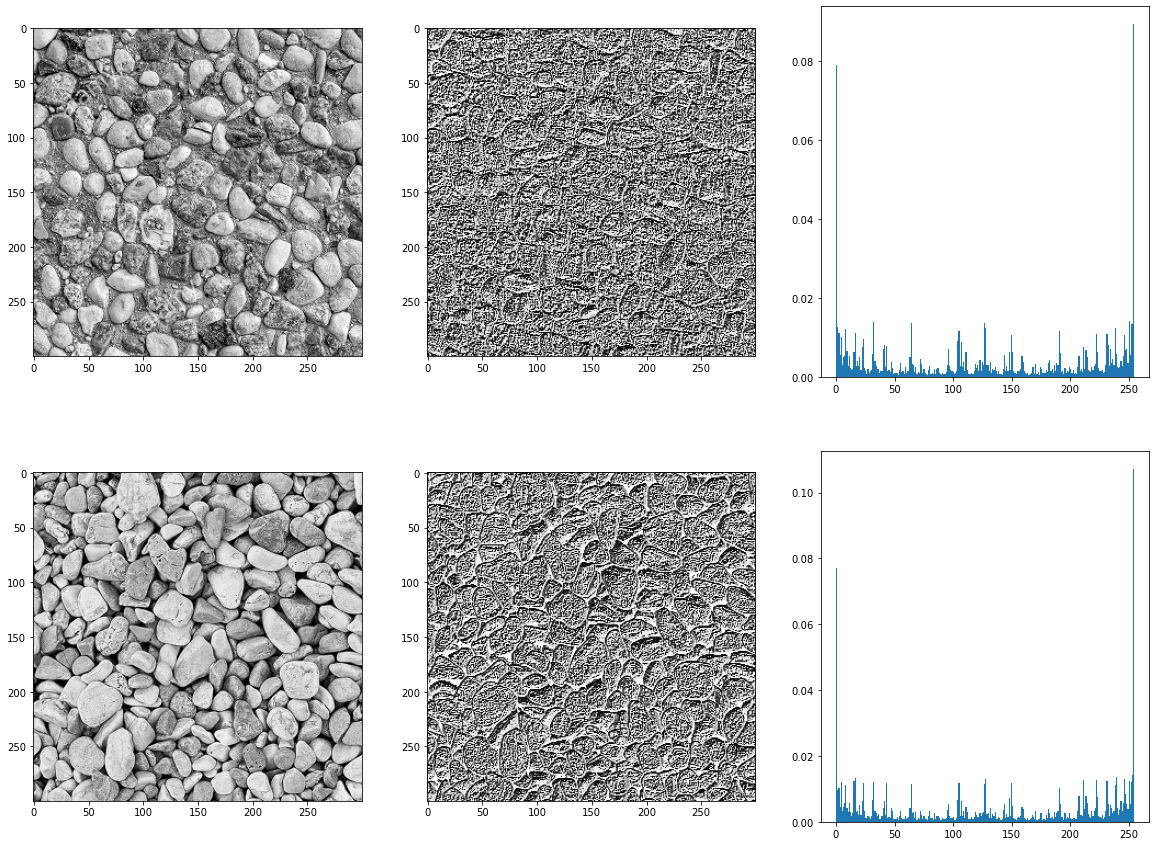

In [24]:
f, ax = plt.subplots(nrows=2,ncols=3,figsize=(20,15))

ax[0][0].imshow(piedras1,'gray')
ax[1][0].imshow(piedras2,'gray')
ax[0][1].imshow(piedras1_texture,'gray')
ax[1][1].imshow(piedras2_texture,'gray')
proba_pie1,bins1, _ = ax[0][2].hist(x=piedras1_texture.flatten(),bins=256,density=True)
proba_pie1,bins2, _ = ax[1][2].hist(x=piedras2_texture.flatten(),bins=256,density=True)

plt.show()

## Cielo

In [86]:
cielo = cv.imread('cielo.png',cv.IMREAD_GRAYSCALE)
cielo_texture = LBP(cielo)


El B&N no favorece la visualizacion de la imagen, pero puede verse en el histograma de texturas un pico de saturacion.

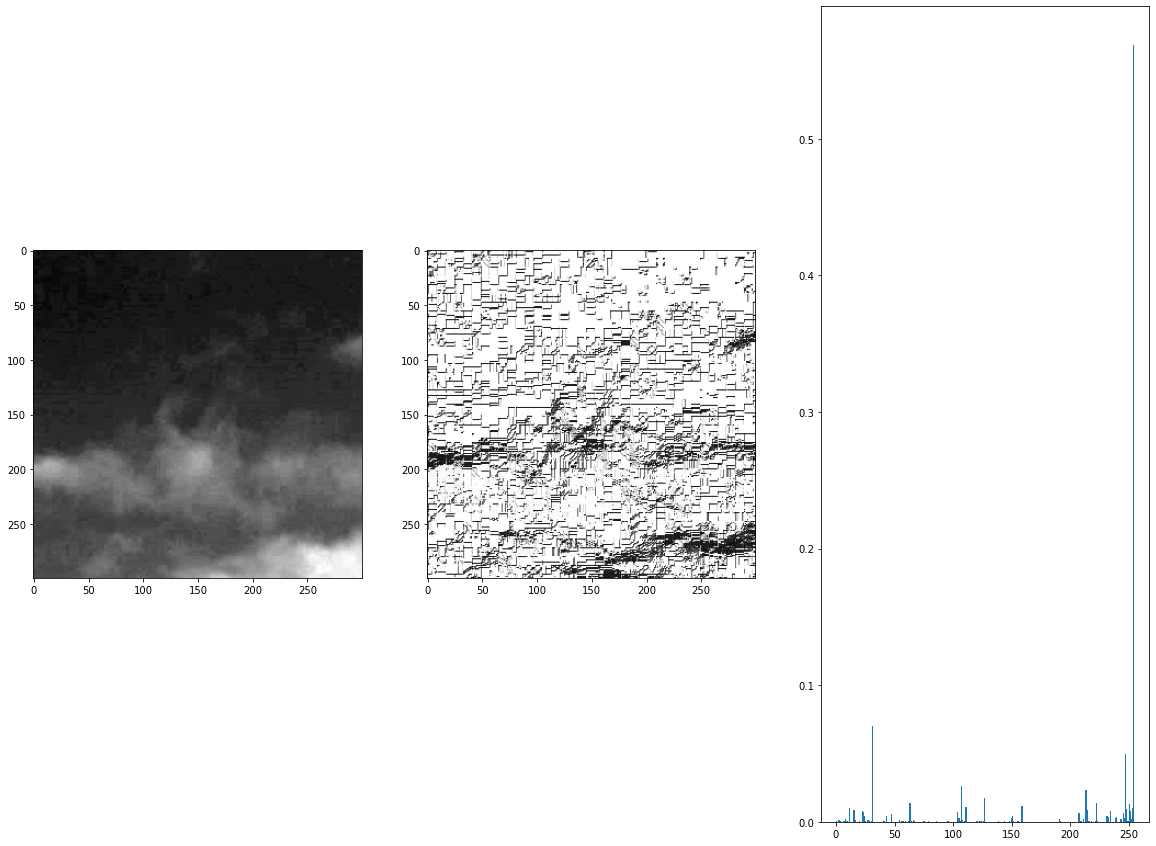

In [87]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,15))

ax[0].imshow(cielo,'gray')
ax[1].imshow(cielo_texture,'gray')
proeba_cielo,bins_cielo, _ = ax[2].hist(x=cielo_texture.flatten(),bins=256,density=True)

plt.show()

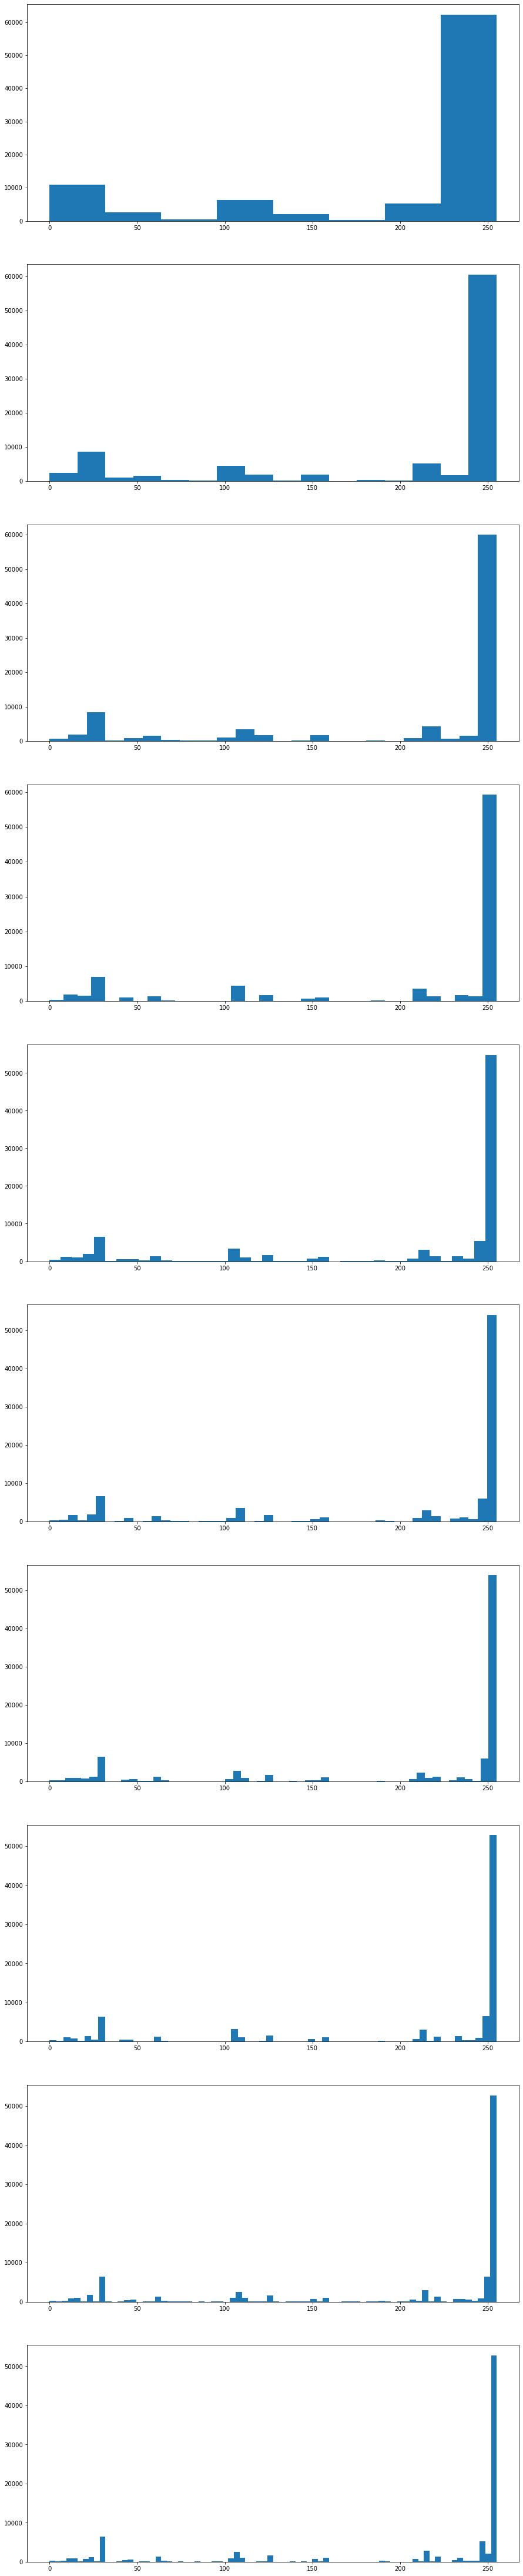

In [88]:
cielo_t = cielo_texture.flatten()

fig,ax = plt.subplots(nrows=10,ncols=1,figsize=(15,80))

for i in range(0,10):
    _,_,_ = ax[i].hist(cielo_t,bins=8*(i+1))
plt.show()

